In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## The dataset used in this this analysis can be obtained from:
https://github.com/CamDavidsonPilon/lifelines/blob/master/lifelines/datasets/dd.csv    

In [2]:
df  = pd.read_csv('dd.csv')
df.head()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


## Dropping unwanted columns

In [3]:
df.drop(["cowcode2", "politycode", "un_region_name", "ehead", "leaderspellreg"], axis = 1, inplace = True) 


In [4]:
df.head()

,ctryname,un_continent_name,democracy,regime,start_year,duration,observed
0,Afghanistan,Asia,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,Asia,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,Asia,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,Asia,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,Asia,Non-democracy,Civilian Dict,1978,1,0


## Renaming columns conveniently

In [5]:
df.rename(columns ={'ctryname': 'Country', 'un_continent_name': 'Continent'}, inplace = True)

In [6]:
df.head()

,Country,Continent,democracy,regime,start_year,duration,observed
0,Afghanistan,Asia,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,Asia,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,Asia,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,Asia,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,Asia,Non-democracy,Civilian Dict,1978,1,0


## Bit Info about our dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1808 entries, 0 to 1807
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     1808 non-null   object
 1   Continent   1808 non-null   object
 2   democracy   1808 non-null   object
 3   regime      1808 non-null   object
 4   start_year  1808 non-null   int64 
 5   duration    1808 non-null   int64 
 6   observed    1808 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 99.0+ KB


## Checking the categorial columns

In [8]:
categorial= [i  for i in df.columns if df[i].dtype==object]
categorial.remove("Country")
    

In [9]:
for i in categorial:
    print('Column Name: ',i)
    print(df[i].value_counts())
    print('#############################')

Column Name:  Continent
Europe      576
Americas    412
Asia        398
Africa      314
Oceania     108
Name: Continent, dtype: int64
#############################
Column Name:  democracy
Democracy        1187
Non-democracy     621
Name: democracy, dtype: int64
#############################
Column Name:  regime
Parliamentary Dem    585
Civilian Dict        330
Presidential Dem     327
Mixed Dem            275
Military Dict        236
Monarchy              55
Name: regime, dtype: int64
#############################


## Predictive Power Score

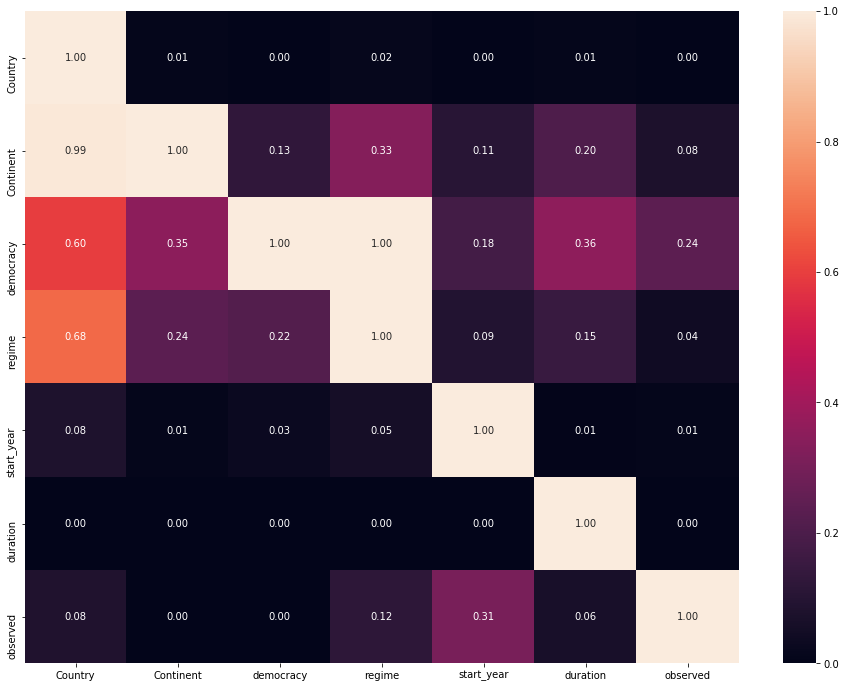

In [10]:
import warnings
warnings.filterwarnings("ignore")
import ppscore as pps
plt.figure(figsize=(16,12))
sns.heatmap(pps.matrix(df),annot=True,fmt=".2f")
plt.show()

## Correlation Heatmap

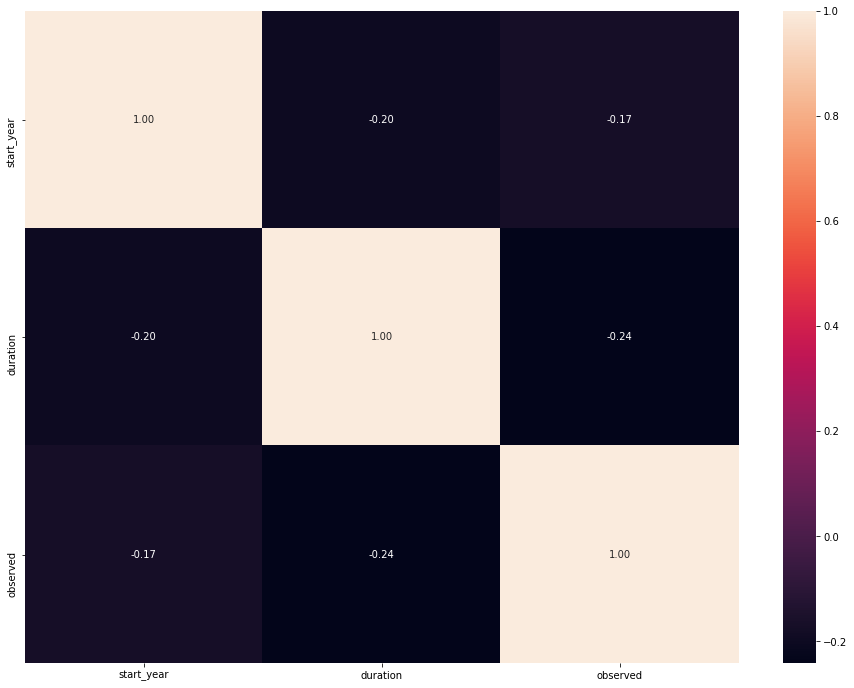

In [11]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

## Visual Analysis of the Observed column

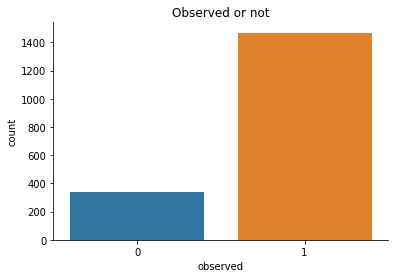

In [12]:
fig, ax = plt.subplots()

right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines['top']
top_side.set_visible(False) 
sns.countplot(df['observed'])
plt.title('Observed or not')

plt.show()


## Further analysis of the observed column

In [13]:
no_of_observations = len(df)
(df.groupby('observed').count()/no_of_observations)

,Country,Continent,democracy,regime,start_year,duration
observed,,,,,,
0,0.188053,0.188053,0.188053,0.188053,0.188053,0.188053
1,0.811947,0.811947,0.811947,0.811947,0.811947,0.811947


##### The above calculation shows around 82% of the data was observed while only around 18% data was right censored

## Visual Analysis of the duration column

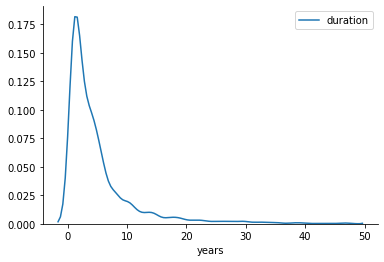

In [14]:
fig, ax = plt.subplots()

right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines['top']
top_side.set_visible(False) 

sns.kdeplot(data = df['duration'])
plt.xlabel('years')
plt.show()


#### The pdf is maximum at around 5 years and the density is more concentrated between 0 and 10 years. 

###  Grouping on the basis of democracy

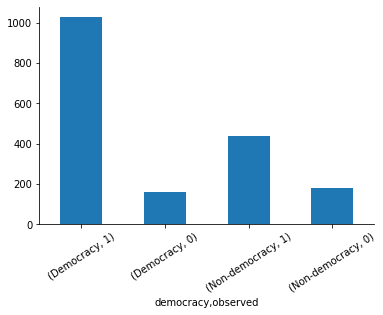

In [15]:
fig, ax = plt.subplots()

right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines['top']
top_side.set_visible(False)
df.groupby("democracy")["observed"].value_counts().plot(kind='bar')
plt.xticks(rotation=33)
plt.show()

### Grouping on the basis of regime

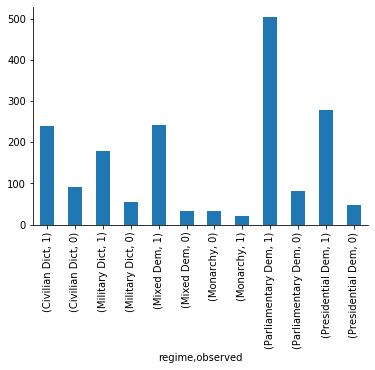

In [16]:
fig, ax = plt.subplots()

right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines['top']
top_side.set_visible(False)
df.groupby("regime")["observed"].value_counts().plot(kind='bar')

plt.show()

## Visual analysis of the regime column

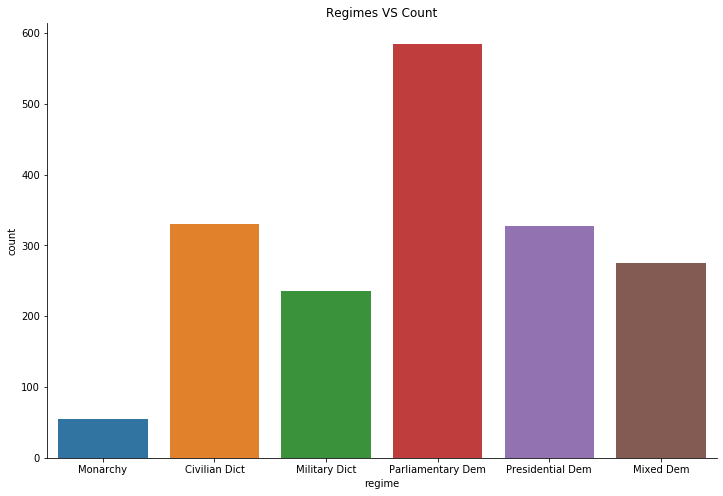

In [17]:
fig, ax = plt.subplots(figsize = (12, 8))

right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines['top']
top_side.set_visible(False) 
sns.countplot(df['regime'])
plt.title('Regimes VS Count')

plt.show()

### Grouping on the basis of continent

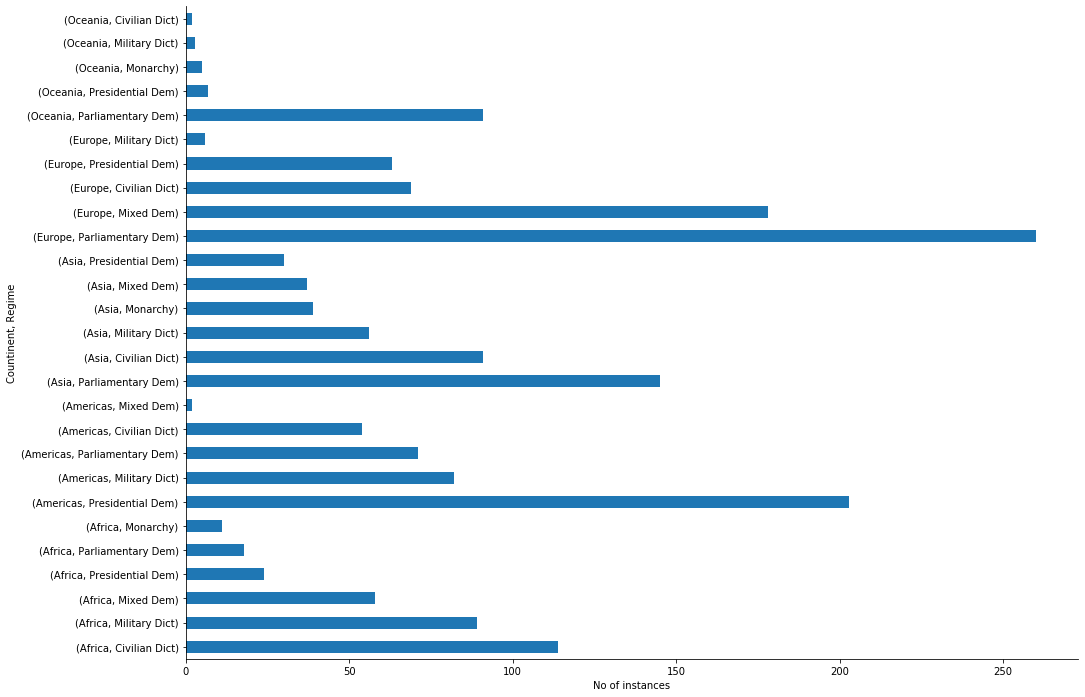

In [18]:
fig, ax = plt.subplots(figsize = (16,12))
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines['top']
top_side.set_visible(False) 

df.groupby('Continent')['regime'].value_counts().plot(kind = 'barh')
plt.ylabel("Countinent, Regime")
plt.xlabel("No of instances")
plt.show()


## Visual analyis of the democracy column

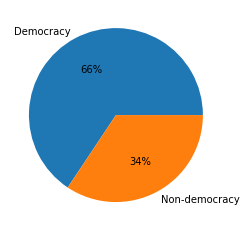

In [19]:
df['democracy'].value_counts().plot(kind='pie',  autopct='%1.0f%%')
plt.ylabel("")
plt.show()


#### PS:Democracy Rules

### Grouping on the basis of continent

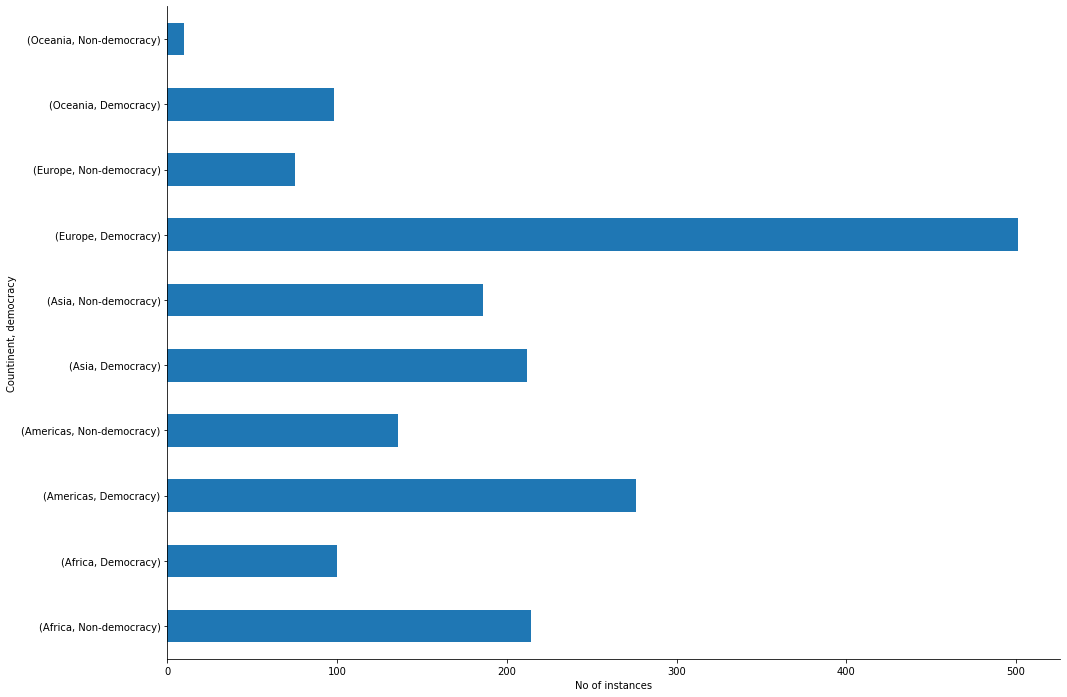

In [20]:
fig, ax = plt.subplots(figsize = (16,12))
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines['top']
top_side.set_visible(False) 

df.groupby('Continent')['democracy'].value_counts().plot(kind = 'barh')
plt.ylabel("Countinent, democracy")
plt.xlabel("No of instances")
plt.show()


## Creating a new column on the basis of year

In [21]:
#Function for period evaluation
def period(year):
    if year > 1945 and year <= 1965:
        return 'Early'
    elif year > 1965 and year <=1985:
        return 'Middle'
    else:
        return 'Late'
    

In [22]:
df['start_year'] = pd.to_numeric(df['start_year'])


In [23]:
df['Period'] = df['start_year'].apply(period)

In [24]:
df.head()

,Country,Continent,democracy,regime,start_year,duration,observed,Period
0,Afghanistan,Asia,Non-democracy,Monarchy,1946,7,1,Early
1,Afghanistan,Asia,Non-democracy,Civilian Dict,1953,10,1,Early
2,Afghanistan,Asia,Non-democracy,Monarchy,1963,10,1,Early
3,Afghanistan,Asia,Non-democracy,Civilian Dict,1973,5,0,Middle
4,Afghanistan,Asia,Non-democracy,Civilian Dict,1978,1,0,Middle


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1808 entries, 0 to 1807
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     1808 non-null   object
 1   Continent   1808 non-null   object
 2   democracy   1808 non-null   object
 3   regime      1808 non-null   object
 4   start_year  1808 non-null   int64 
 5   duration    1808 non-null   int64 
 6   observed    1808 non-null   int64 
 7   Period      1808 non-null   object
dtypes: int64(3), object(5)
memory usage: 113.1+ KB


## Analysing our new column

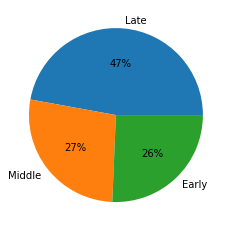

In [26]:
df['Period'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.ylabel("")
plt.show()

#### 47% of the data is frm the years after 1985

In [27]:
df.groupby('Period')['democracy'].value_counts()

Period  democracy    
Early   Democracy        265
        Non-democracy    199
Late    Democracy        660
        Non-democracy    192
Middle  Democracy        262
        Non-democracy    230
Name: democracy, dtype: int64

In [28]:
df.groupby('Period')['regime'].value_counts()

Period  regime           
Early   Parliamentary Dem    142
        Civilian Dict        103
        Presidential Dem      88
        Military Dict         67
        Mixed Dem             35
        Monarchy              29
Late    Parliamentary Dem    289
        Mixed Dem            202
        Presidential Dem     169
        Civilian Dict        127
        Military Dict         54
        Monarchy              11
Middle  Parliamentary Dem    154
        Military Dict        115
        Civilian Dict        100
        Presidential Dem      70
        Mixed Dem             38
        Monarchy              15
Name: regime, dtype: int64

## Grouping by the period column and plotting the democracies

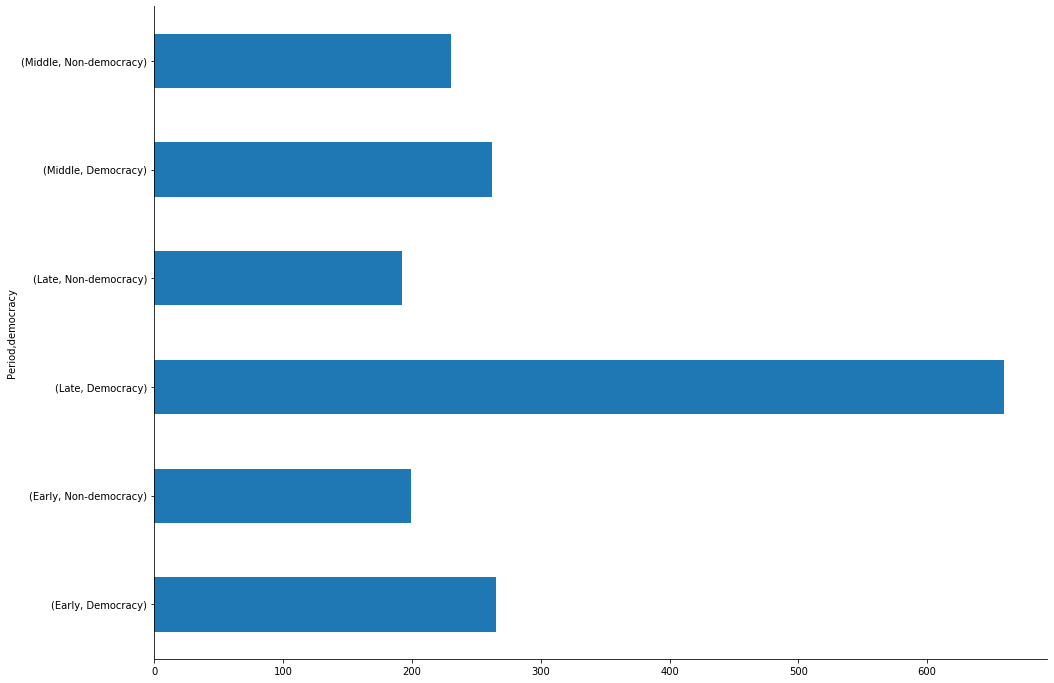

In [29]:
fig, ax = plt.subplots(figsize = (16,12))
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines['top']
top_side.set_visible(False) 

df.groupby('Period')['democracy'].value_counts().plot(kind = 'barh')
plt.show()

#### The above plot shows states that democracy is dominating after the year 1985

## Grouping by the period column and plotting the regimes

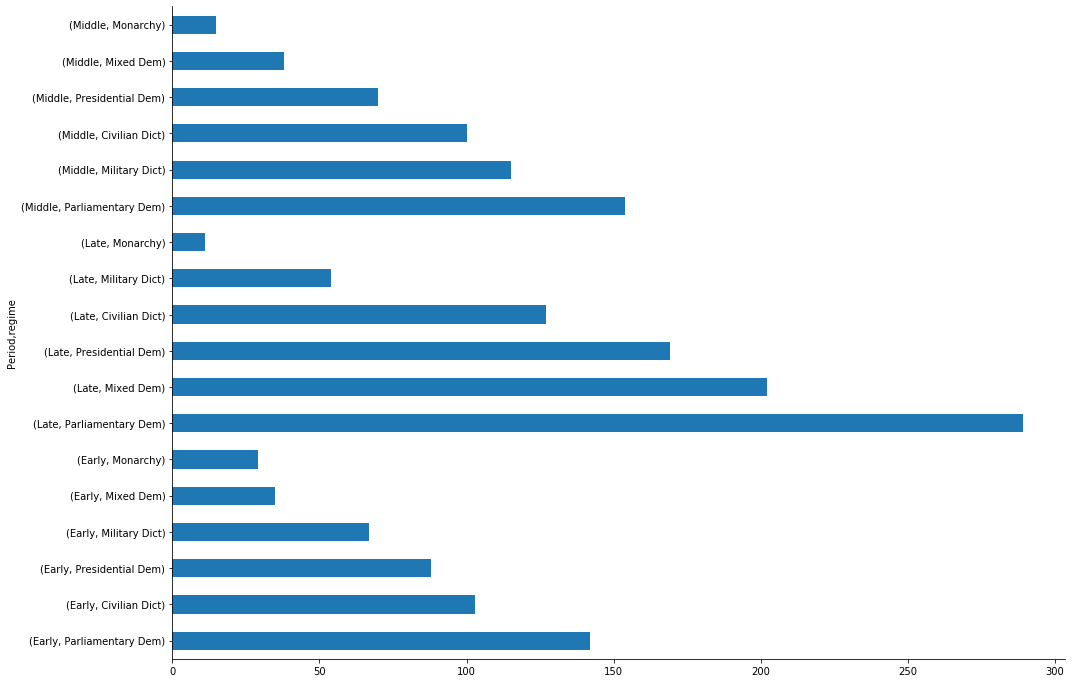

In [30]:
fig, ax = plt.subplots(figsize = (16,12))
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines['top']
top_side.set_visible(False) 

df.groupby('Period')['regime'].value_counts().plot(kind = 'barh')
plt.show()

#### The above plot shows that parliamentary democracy has been the majority  in all the periods while its count is maximum in the late period

## A jointplot between the duration and observed column

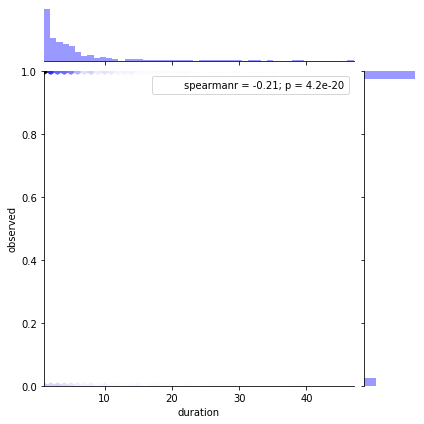

In [31]:
from scipy.stats import spearmanr
sns.jointplot(x='duration',y='observed',data=df,kind='hex',color='blue',stat_func=spearmanr)

#### Not a very strong correlation we see here

## A pairplot between the columns of our dataset:

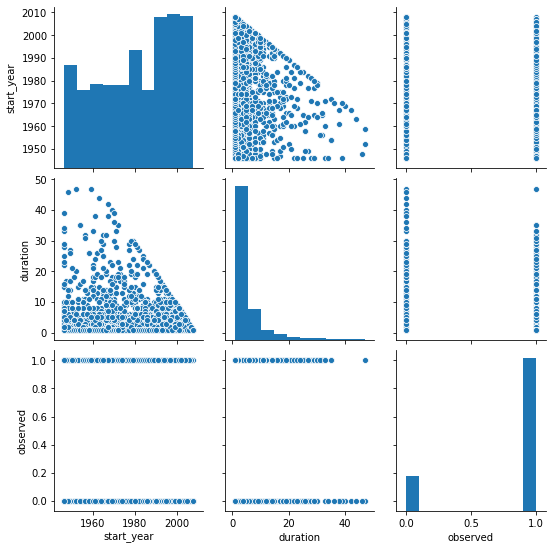

In [33]:
sns.pairplot(df)
plt.show()

## Histogram between duration and observed columns

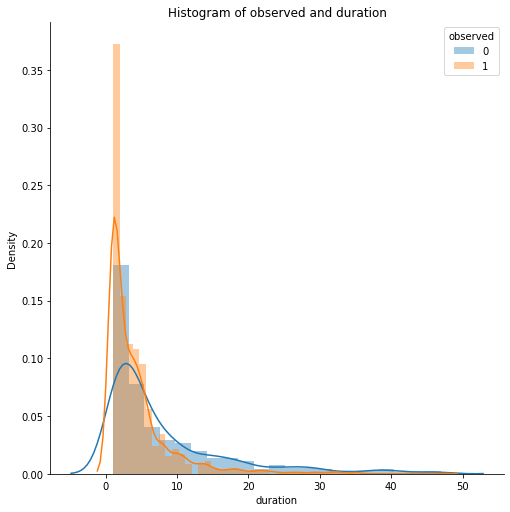

In [35]:
sns.FacetGrid(df, hue = "observed", size = 7).map(sns.distplot, "duration")
plt.title("Histogram of observed and duration")
plt.ylabel("Density")
plt.legend(title="observed")
plt.show()


#### we see that the observed and not observedd density both are concentrated between 0 and 10 years of duration but the peak is higher for the observed.

## Histogram between observed and start year of the government

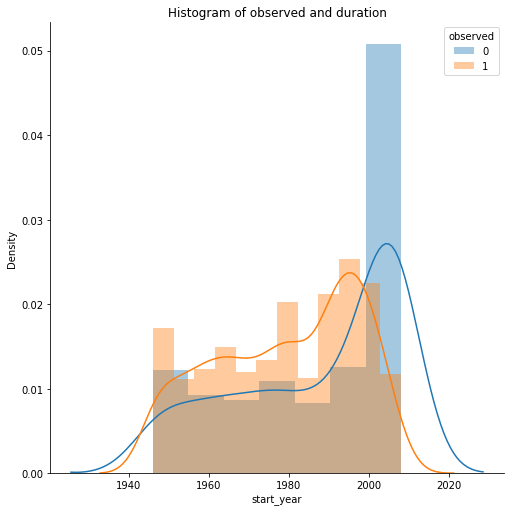

In [36]:
sns.FacetGrid(df, hue = "observed", size = 7).map(sns.distplot, "start_year")
plt.title("Histogram of observed and start_year")
plt.ylabel("Density")
plt.legend(title="observed")
plt.show()

#### We see that the  non observed probability density is higher between 1990 and the 2010 while the observed probability density is higher between almost the same suration but is a bit narrow and the observed   curve reaches a higher peak as ompared to non observed one

## Kaplan Meier Curve for the dataset

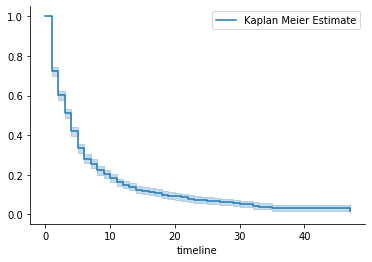

In [38]:
from lifelines import KaplanMeierFitter
fig, ax = plt.subplots()

right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines['top']
top_side.set_visible(False) 
time = df['duration']

event = df['observed']  
kmf = KaplanMeierFitter() 
kmf.fit(time, event,label='Kaplan Meier Estimate')
kmf.plot()

plt.show()